In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
data = np.load("T100TTFT.npz", allow_pickle=True)
settings = data['settings'].item()
raw = data['raw'].item()
nu3D = raw['nu3D']
nubar3D = raw['nubar3D']

In [93]:
T = settings['T']
N = settings['N'] + 1
E = np.linspace(0,settings['eps_max'], N) * T
time = raw['time']

In [94]:
def dnue_dE(E, P0, Pz):
    return E**2 / (2 * np.pi**2) * 1/2 * P0 * (1+Pz)
def dnumu_dE(E, P0, Pz):
    return E**2 / (2 * np.pi**2) * 1/2 * P0 * (1-Pz)

In [95]:
def create_c(function, data):
    c = np.zeros((len(data), len(E[1:])))
    for j in range(len(E[1:])):
        initial = function(E[j+1], data[0,j,0], data[0,j,3])
        for i in range(len(data)):
            c[i,j] = function(E[j+1], data[i,j,0], data[i,j,3]) / initial
    return c.T

In [96]:
def one_number_density(t, ddE, data):
    y = np.zeros(len(E[1:]))
    for i in range(len(y)):
        y[i] = ddE(E[i+1], data[t,i,0], data[t,i,3])
    
    return 4 * np.pi**2 / (3 * 1.20206 * T**3) * np.trapz(y,E[1:])

In [97]:
def all_number_densities(ddE, data):
    n = np.zeros(len(time))
    for i in range(len(time)):
        n[i] = one_number_density(i, ddE, data)
    return n

In [98]:
def plot(function, data, title):
    fig = plt.figure(figsize=[4,3])
    color = plt.axes([0.1, 0, 1.00, 1.11])
    dens = plt.axes([0.1, 1.11, 1.00, 0.5])

    x = time
    y = all_number_densities(function, data)
    dens.plot(x,y)
    dens.set_ylabel("number density/thermal distribution n_nu / n_{nu, th}")
    
    c = create_c(function, data)
    color.imshow(c[:,1:],origin='lower',vmin=0.9,vmax=1.1,aspect='auto',extent=(time[0], time[len(time)-1], E[0], E[len(E)-1]))
    color.set_ylabel("Energy")
    
    dens.xaxis.set_major_formatter(plt.NullFormatter())
    color.set_xlabel("Time")
    plt.title(title)

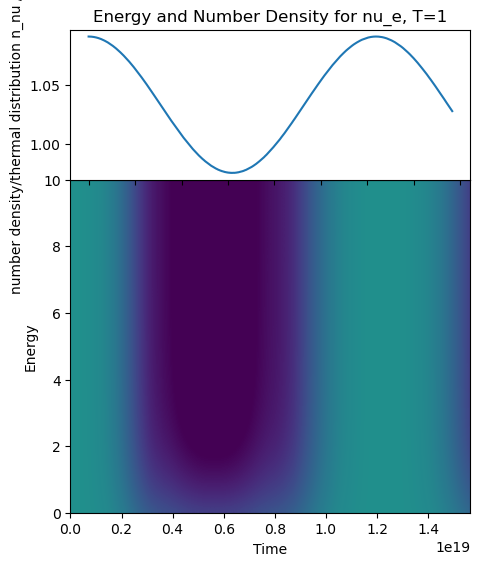

In [99]:
plot(dnue_dE, nu3D, "Energy and Number Density for nu_e, T=1")

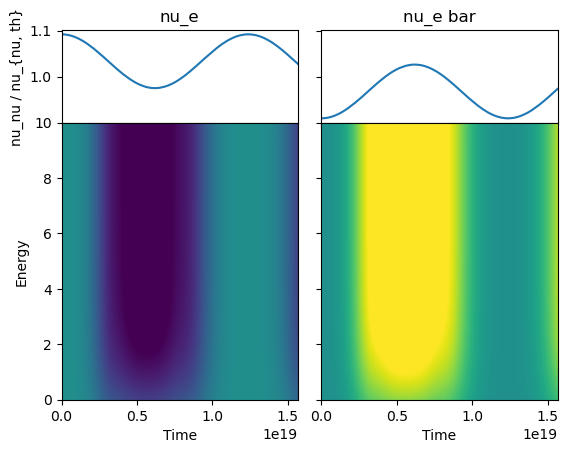

In [104]:
x = time
y1 = all_number_densities(dnue_dE, nu3D)

x2 = time
y2 = all_number_densities(dnue_dE, nubar3D)

c1 = create_c(dnue_dE, nu3D)
c2 = create_c(dnue_dE, nubar3D)

f, axs = plt.subplots(nrows=2,ncols=2,sharex='col', sharey='row', height_ratios=[1,3])
plt.subplots_adjust(wspace=0.1, hspace=0)

axs[0,0].plot(x,y1)
axs[0,0].set_title("nu_e")
axs[0,0].set_ylabel("nu_nu / nu_{nu, th}")
axs[0,1].plot(x,y2)
axs[0,1].set_title("nu_e bar")
axs[1,0].imshow(c1[:,1:],origin='lower',vmin=0.9,vmax=1.1,aspect='auto',extent=(time[0], time[len(time)-1], E[0], E[len(E)-1]))
axs[1,0].set_xlabel("Time")
axs[1,0].set_ylabel("Energy")
axs[1,1].imshow(c2[:,1:],origin='lower',vmin=0.9,vmax=1.1,aspect='auto',extent=(time[0], time[len(time)-1], E[0], E[len(E)-1]))
axs[1,1].set_xlabel("Time")
plt.show()

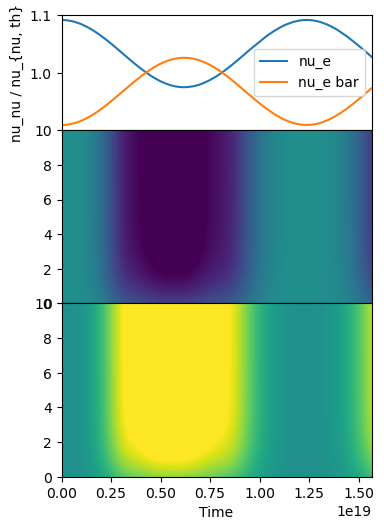

In [102]:
x = time
y1 = all_number_densities(dnue_dE, nu3D)

y2 = all_number_densities(dnue_dE, nubar3D)

c1 = create_c(dnue_dE, nu3D)
c2 = create_c(dnue_dE, nubar3D)

f, axs = plt.subplots(nrows=3,ncols=1,sharex='col', sharey='row', height_ratios=[2,3,3], figsize=(4,6))
plt.subplots_adjust(wspace=0.2, hspace=0)

axs[0].plot(x,y1, label='nu_e')
axs[0].plot(x,y2, label='nu_e bar')
axs[0].legend()
axs[0].set_ylabel("nu_nu / nu_{nu, th}")
axs[1].imshow(c1[:,1:],origin='lower',vmin=0.9,vmax=1.1,aspect='auto',extent=(time[0], time[len(time)-1], E[0], E[len(E)-1]))
axs[1].set_xlabel("Time")
axs[2].imshow(c2[:,1:],origin='lower',vmin=0.9,vmax=1.1,aspect='auto',extent=(time[0], time[len(time)-1], E[0], E[len(E)-1]))
axs[2].set_xlabel("Time")
plt.show()